In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train 시퀀스')
print(len(input_test), 'test 시퀀스')
print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기', input_train.shape)
print('input_test 크기', input_test.shape)

데이터 로딩...
25000 train 시퀀스
25000 test 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기 (25000, 500)
input_test 크기 (25000, 500)


In [9]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

C:\Users\Administrator\Anaconda3\envs\Tensor\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6276 - acc: 0.6326 - val_loss: 0.5026 - val_acc: 0.7768
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3909 - acc: 0.8323 - val_loss: 0.4379 - val_acc: 0.7996
Epoch 3/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2915 - acc: 0.8835 - val_loss: 0.3874 - val_acc: 0.8500
Epoch 4/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2221 - acc: 0.9154 - val_loss: 0.4101 - val_acc: 0.8186
Epoch 5/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1698 - acc: 0.9392 - val_loss: 0.3985 - val_acc: 0.8330
Epoch 6/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1211 - acc: 0.9589 - val_loss: 0.4333 - val_acc: 0.8454
Epoch 7/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.0831 - acc: 0.9722 - val_loss: 0.5171 - val_acc:

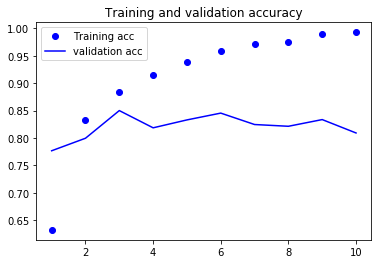

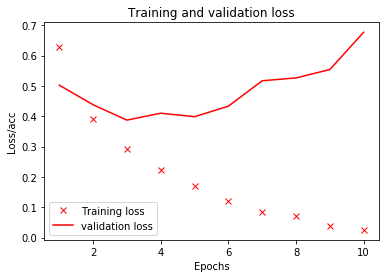

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()  # 2개의 그래프로 분리

plt.plot(epochs, loss, 'rx', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Loss/acc')
plt.legend()
plt.show()